<a href="https://colab.research.google.com/github/rajatshah2006/AILMLCourseNoteBook/blob/main/Milestone2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>
<center><font size=8>NLP Chatbot</center></font>

<br><br>


# Problem Statement
##### **DOMAIN:**
Industrial safety. NLP based Chatbot.
##### **CONTEXT:**
The  database  comes  from one  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
##### **DATA DESCRIPTION:**
The  database  is  basically  records  of  accidents  from 12  different  plants  in  03  different  countries which  every  line  in  the  data  is  an occurrence of an accident.

**Columns description:**
- `Data:` timestamp or time/date information
- `Countries:` which country the accident occurred (anonymised)
- `Local:` the city where the manufacturing plant is located (anonymised)
- `Industry sector:` which sector the plant belongs to
- `Accident level:` from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- `Potential Accident Level:` Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- `Genre:` if the person is male of female
- `Employee or Third Party:` if the injured person is an employee or a third party
- `Critical Risk:` some description of the risk involved in the accident
- `Description:` Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

##### **PROJECT OBJECTIVE:**
The objective of the project is to design an ML/DL-based chatbot utility that can help professionals highlight safety risks based on incident descriptions. This chatbot will analyze accident descriptions and provide risk assessments, which can aid industries in identifying potential hazards and taking preventive measures.

In [ ]:
 # Connect Google Drive : Rajat

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
from gensim.models import Word2Vec, KeyedVectors
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/AIMLCourse/CapstoneProject/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx"
xl_name = pd.ExcelFile(file_path)
df = pd.read_excel(xl_name, sheet_name='Data Set - industrial_safety_an')

In [ ]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


In [ ]:
df.shape

(425, 11)

 - **Total Rows:** 425
 - **Total Columns:** 11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


# Data Cleansing

In [ ]:
# Drop the unnecessary "Unnamed: 0" column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Standardize column names (remove spaces and lowercase them)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Renaming columns
df.rename(columns={'data':'date', 'countries':'country', 'local':'city', 'genre':'gender', 'employee_or_third_party':'employee_type'}, inplace=True)

In [ ]:
# Extracting year & month from 'Data' column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [ ]:
# Convert categorical columns to lowercase for consistency
categorical_cols = ["country", "city", "industry_sector", "accident_level",
                    "potential_accident_level", "gender", "employee_type", "critical_risk", "day"]

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype(str).str.lower().str.strip())

 - **Date transformation:** Extracted year, month, and day names for potential time-based analysis.
 - **Categorical standardization:** Converted categorical columns to lowercase and stripped spaces for consistency.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      425 non-null    datetime64[ns]
 1   country                   425 non-null    object        
 2   city                      425 non-null    object        
 3   industry_sector           425 non-null    object        
 4   accident_level            425 non-null    object        
 5   potential_accident_level  425 non-null    object        
 6   gender                    425 non-null    object        
 7   employee_type             425 non-null    object        
 8   critical_risk             425 non-null    object        
 9   description               425 non-null    object        
 10  year                      425 non-null    int32         
 11  month                     425 non-null    int32         
 12  day                   

In [ ]:
# Checking for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 7


In [ ]:
# Display duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,date,country,city,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,year,month,day
77,2016-04-01,country_01,local_01,mining,i,v,male,third party (remote),others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout.",2016,4,friday
262,2016-12-01,country_01,local_03,mining,i,iv,male,employee,others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud.",2016,12,thursday
303,2017-01-21,country_02,local_02,mining,i,i,male,third party (remote),others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs.",2017,1,saturday
345,2017-03-02,country_03,local_10,others,i,i,male,third party,venomous animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site.",2017,3,thursday
346,2017-03-02,country_03,local_10,others,i,i,male,third party,venomous animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site.",2017,3,thursday
355,2017-03-15,country_03,local_10,others,i,i,male,third party,venomous animals,"Team of the VMS Project performed soil collection on the Xixás target with 3 members. When the teams were moving from one collection point to another, Mr. Fabio was ahead of the team, stinging behind Robson and Manoel da Silva. near the collection point were surprised by a swarm of bees that was inside a I play near the ground, with no visibility in the woods and no hissing noise. Fabio passed by the stump, but Robson and Manoel da Silva were attacked by the bees. Robson had a sting in his left arm over his uniform and Manoel da Silva had a prick in his lip as his scre

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
country,0
city,0
industry_sector,0
accident_level,0
potential_accident_level,0
gender,0
employee_type,0
critical_risk,0
description,0


- **Number of Duplicates Removed:** 7
 - **Missing Values:** None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      418 non-null    datetime64[ns]
 1   country                   418 non-null    object        
 2   city                      418 non-null    object        
 3   industry_sector           418 non-null    object        
 4   accident_level            418 non-null    object        
 5   potential_accident_level  418 non-null    object        
 6   gender                    418 non-null    object        
 7   employee_type             418 non-null    object        
 8   critical_risk             418 non-null    object        
 9   description               418 non-null    object        
 10  year                      418 non-null    int32         
 11  month                     418 non-null    int32         
 12  day                       4

In [ ]:
df.head()

,date,country,city,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,year,month,day
0,2016-01-01,country_01,local_01,mining,i,iv,male,third party,pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,friday
1,2016-01-02,country_02,local_02,mining,i,iv,male,employee,pressurized systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,saturday
2,2016-01-06,country_01,local_03,mining,i,iii,male,third party (remote),manual tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,wednesday
3,2016-01-08,country_01,local_04,mining,i,i,male,third party,others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",2016,1,friday
4,2016-01-10,country_01,local_04,mining,iv,iv,male,third party,others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",2016,1,sunday


In [ ]:
for col in categorical_cols:
    print(f"Unique values in {col}: \n{sorted(df[col].unique())}\n")
    print(f"Number of unique values in {col}: {df[col].nunique()}\n")

Unique values in country: 
['country_01', 'country_02', 'country_03']

Number of unique values in country: 3

Unique values in city: 
['local_01', 'local_02', 'local_03', 'local_04', 'local_05', 'local_06', 'local_07', 'local_08', 'local_09', 'local_10', 'local_11', 'local_12']

Number of unique values in city: 12

Unique values in industry_sector: 
['metals', 'mining', 'others']

Number of unique values in industry_sector: 3

Unique values in accident_level: 
['i', 'ii', 'iii', 'iv', 'v']

Number of unique values in accident_level: 5

Unique values in potential_accident_level: 
['i', 'ii', 'iii', 'iv', 'v', 'vi']

Number of unique values in potential_accident_level: 6

Unique values in gender: 
['female', 'male']

Number of unique values in gender: 2

Unique values in employee_type: 
['employee', 'third party', 'third party (remote)']

Number of unique values in employee_type: 3

Unique values in critical_risk: 
['bees', 'blocking and isolation of energies', 'burn', 'chemical substanc

In [ ]:
for col in categorical_cols:
    print(f"Value counts for {col}:\n", df[col].value_counts(), "\n")

Value counts for country:
 country
country_01    248
country_02    129
country_03     41
Name: count, dtype: int64 

Value counts for city:
 city
local_03    89
local_05    59
local_01    56
local_04    55
local_06    46
local_10    41
local_08    27
local_02    23
local_07    14
local_12     4
local_09     2
local_11     2
Name: count, dtype: int64 

Value counts for industry_sector:
 industry_sector
mining    237
metals    134
others     47
Name: count, dtype: int64 

Value counts for accident_level:
 accident_level
i      309
ii      40
iii     31
iv      30
v        8
Name: count, dtype: int64 

Value counts for potential_accident_level:
 potential_accident_level
iv     141
iii    106
ii      95
i       45
v       30
vi       1
Name: count, dtype: int64 

Value counts for gender:
 gender
male      396
female     22
Name: count, dtype: int64 

Value counts for employee_type:
 employee_type
third party             185
employee                178
third party (remote)     55
Name: coun

In [ ]:
# Check for Duplicates Based on "description"
df[df.duplicated(subset=["description"], keep=False)]

# Since the same accident might involve multiple people, keeping them preserves all details

,date,country,city,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,year,month,day
37,2016-02-24,country_02,local_07,mining,i,v,male,employee,others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.,2016,2,wednesday
38,2016-02-24,country_02,local_07,mining,i,v,female,third party,others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.,2016,2,wednesday
130,2016-05-26,country_03,local_10,others,i,i,male,third party,bees,"In the geological reconnaissance activity, in the farm of Mr. Lázaro, the team composed by Felipe and Divino de Morais, in normal activity encountered a ciliary forest, as they needed to enter the forest to verify a rock outcrop which was the front, the Divine realized the opening of the access with machete. At that moment, took a bite from his neck. There were no more attacks, no allergic reaction, and continued work normally. With the work completed, leaving the forest for the same access, the Divine assistant was attacked by a snake and suffered a sting in the forehead. At that moment they moved away from the area. It was verified that there was no type of allergic reaction and returned with normal activities.",2016,5,thursday
131,2016-05-26,country_03,local_10,others,i,i,male,employee,others,"In the geological reconnaissance activity, in the farm of Mr. Lázaro, the team composed by Felipe and Divino de Morais, in normal activity encountered a ciliary forest, as they needed to enter the forest to verify a rock outcrop which was the front, the Divine realized the opening of the access with machete. At that moment, took a bite from his neck. There were no more attacks, no allergic reaction, and continued work normally. With the work completed, leaving the forest for the same access, the Divine assistant was attacked by a snake and suffered a sting in the forehead. At that moment they moved away from the area. It was verified that there was no type of allergic reaction and returned with normal activities.",2016,5,thursday
143,2016-06-08,country_03,local_10,others,i,i,male,third party,bees,"Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but the S.S. and Breno), were attacked and consequently they suffered 02 stings, in the belly and Jehovah in the hand, verified that there was no type of allergic reaction, returned with the normal activities.",2016,6,wednesday
144,2016-06-08,country_03,local_10,others,i,i,male,third party,others,"Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but

In [ ]:
# Check min and max dates (to detect outliers)
print("Earliest Date:", df["date"].min())
print("Latest Date:", df["date"].max())

# Check for invalid dates
invalid_dates = df[~pd.to_datetime(df["date"], errors="coerce").notnull()]
print("Invalid Dates:\n", invalid_dates)

Earliest Date: 2016-01-01 00:00:00
Latest Date: 2017-07-09 00:00:00
Invalid Dates:
 Empty DataFrame
Columns: [date, country, city, industry_sector, accident_level, potential_accident_level, gender, employee_type, critical_risk, description, year, month, day]
Index: []


 - **Duplicate Descriptions:** 14 duplicate incident descriptions were found and retained to preserve all details
 - **No Invalid Dates Found** (All date values are valid)

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# function to plot a pie chart for a particular column

def plot_pie_chart(df, column_name):
    """Plots a pie chart for the specified column in the dataframe.

    Args:
        df: The pandas DataFrame.
        column_name: The name of the column to plot.
    """

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Auto-generate the title dynamically
    chart_title = f"Distribution of {column_name}"

    value_counts = df[column_name].value_counts()
    plt.figure(figsize=(12, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(chart_title.replace('_', ' ').title())
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [ ]:
# function to plot a horizontal bar chart for a particular column
def plot_horizontal_bar_chart(df, column_name):
    """
    Plots a horizontal bar chart for a specific categorical column.

    Args:
        df: The pandas DataFrame.
        column_name: The name of the column to plot.
    """

    # Check if column exists in DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(12, 8))

    # Get value counts sorted in ascending order
    sorted_values = df[column_name].value_counts().sort_values(ascending=True)

    # Plot horizontal bar chart
    sorted_values.plot(kind="barh", color="skyblue")

    # Labels and title
    plt.xlabel("Count")
    plt.ylabel(column_name.replace("_", " ").title())
    plt.title(f"Distribution of {column_name.replace('_', ' ').title()}")

    plt.xticks(rotation=0)  # Ensure x-axis values are readable
    plt.show()


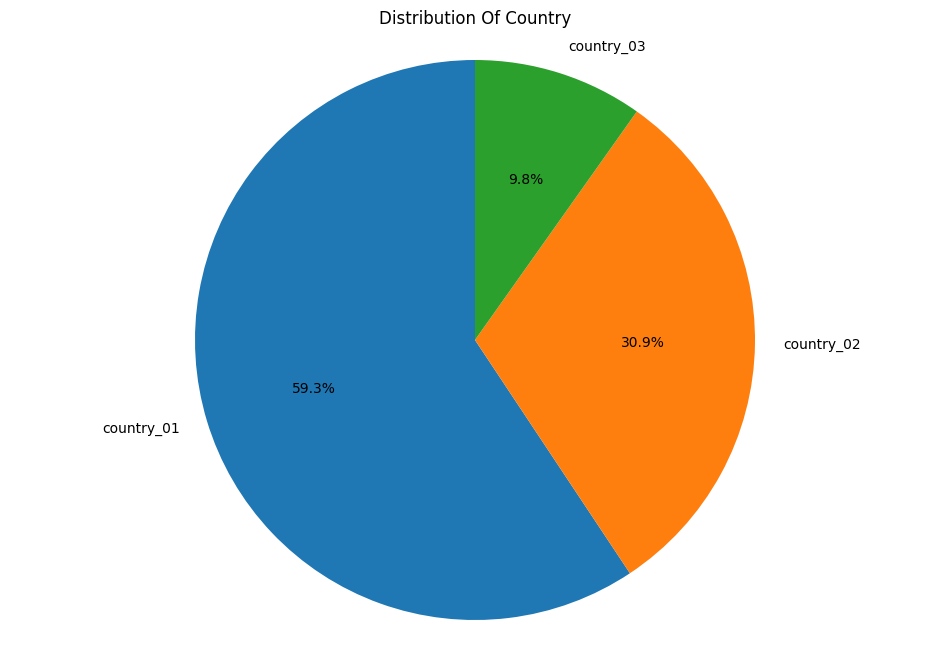

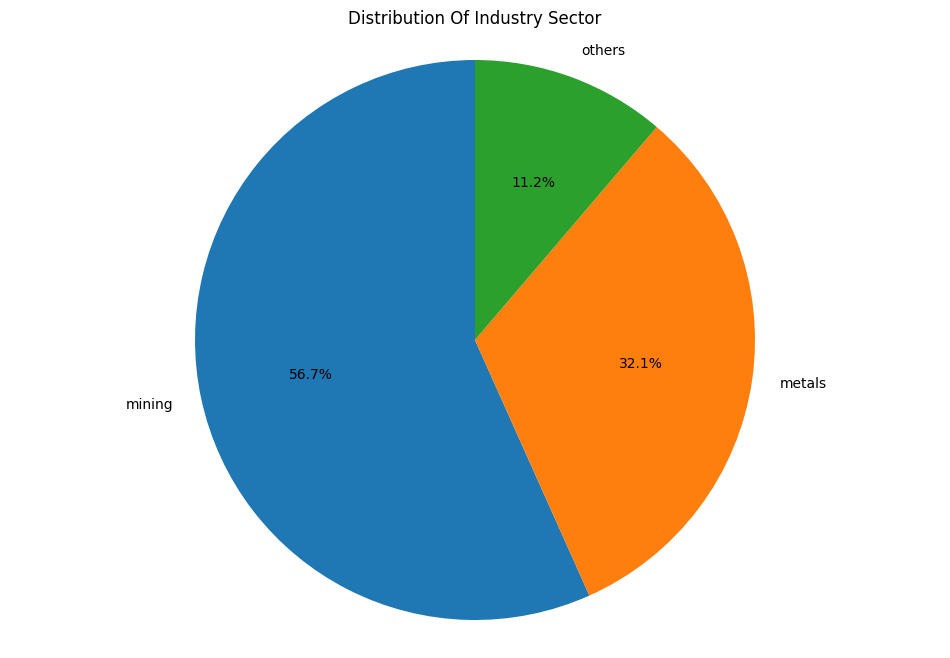

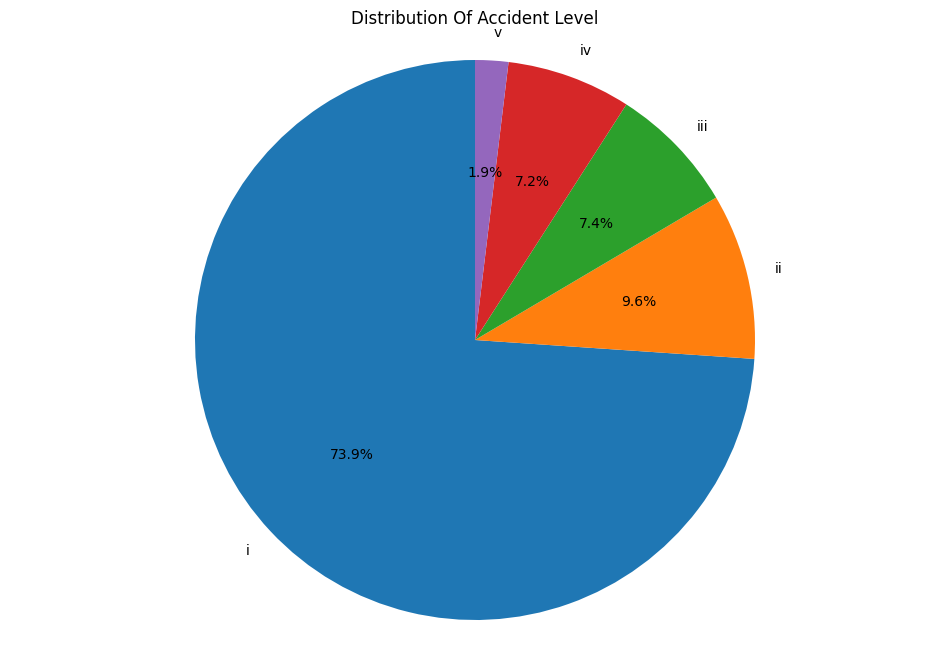

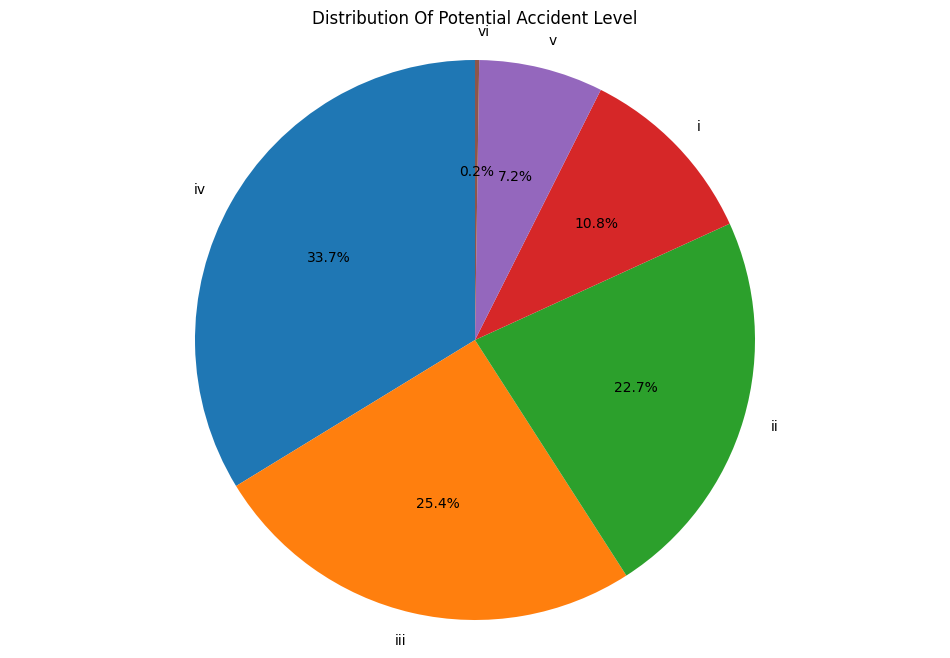

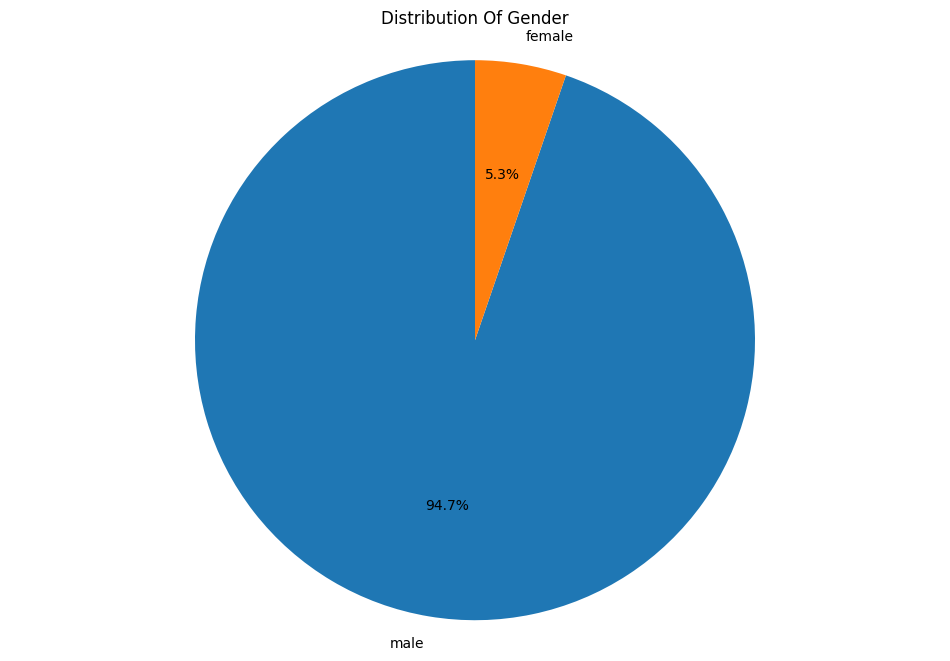

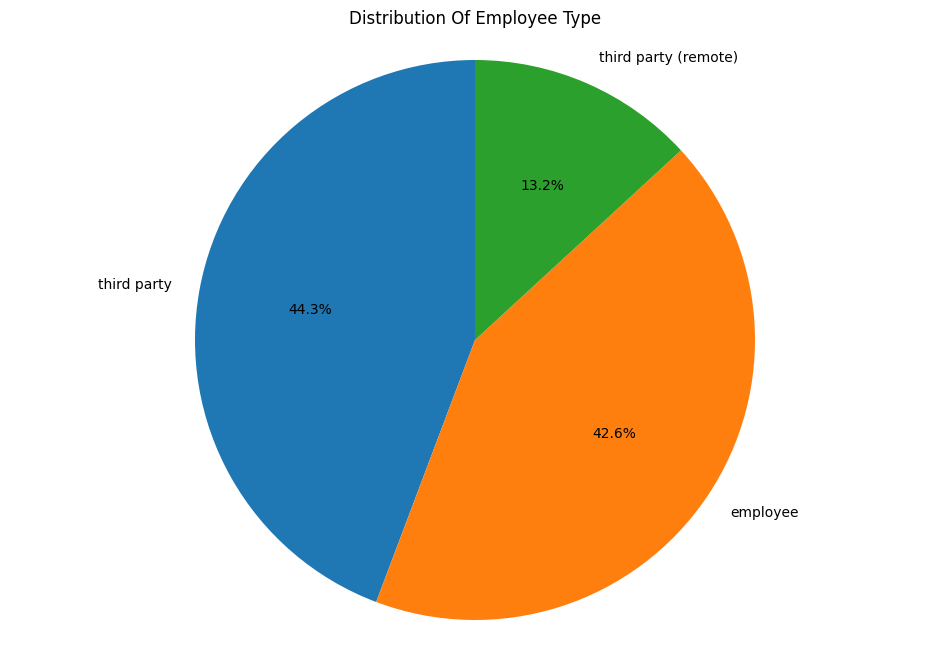

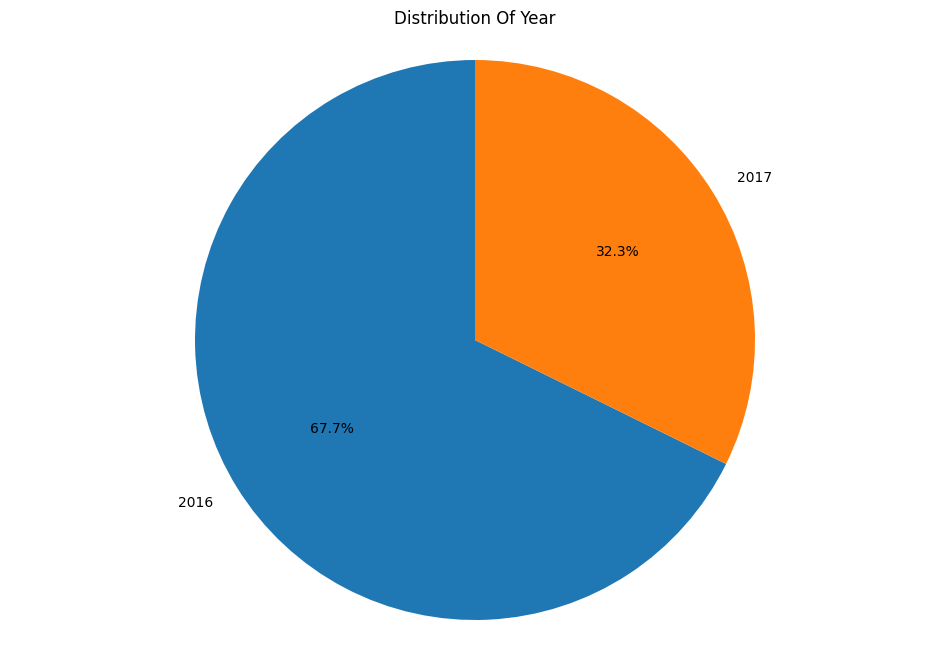

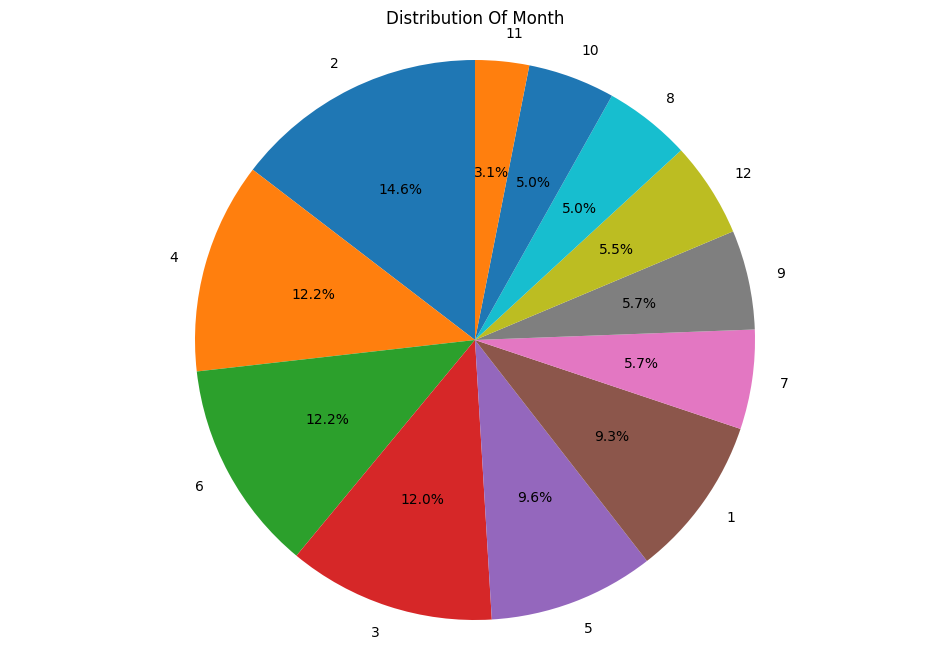

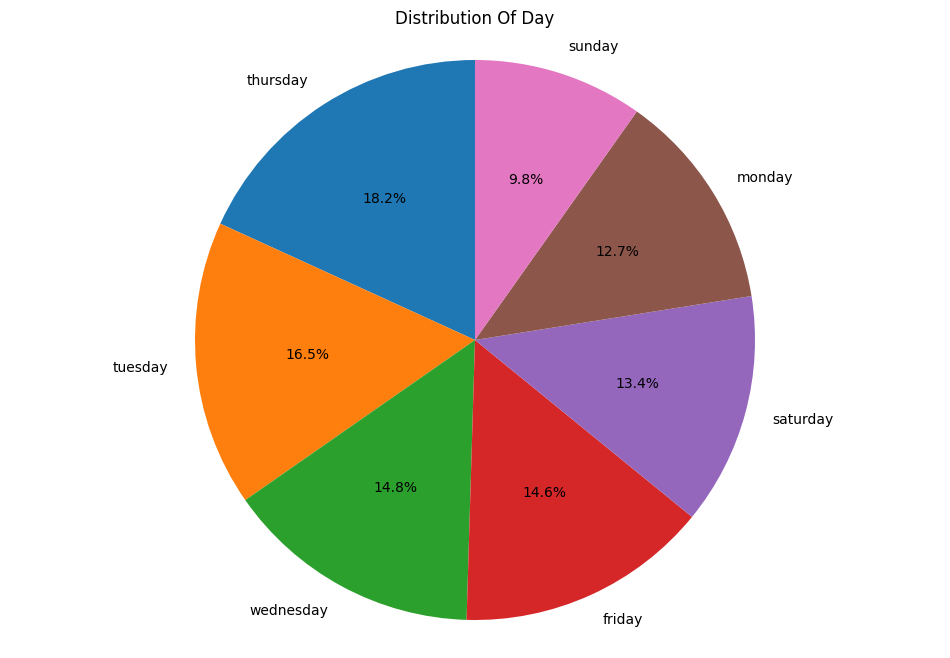

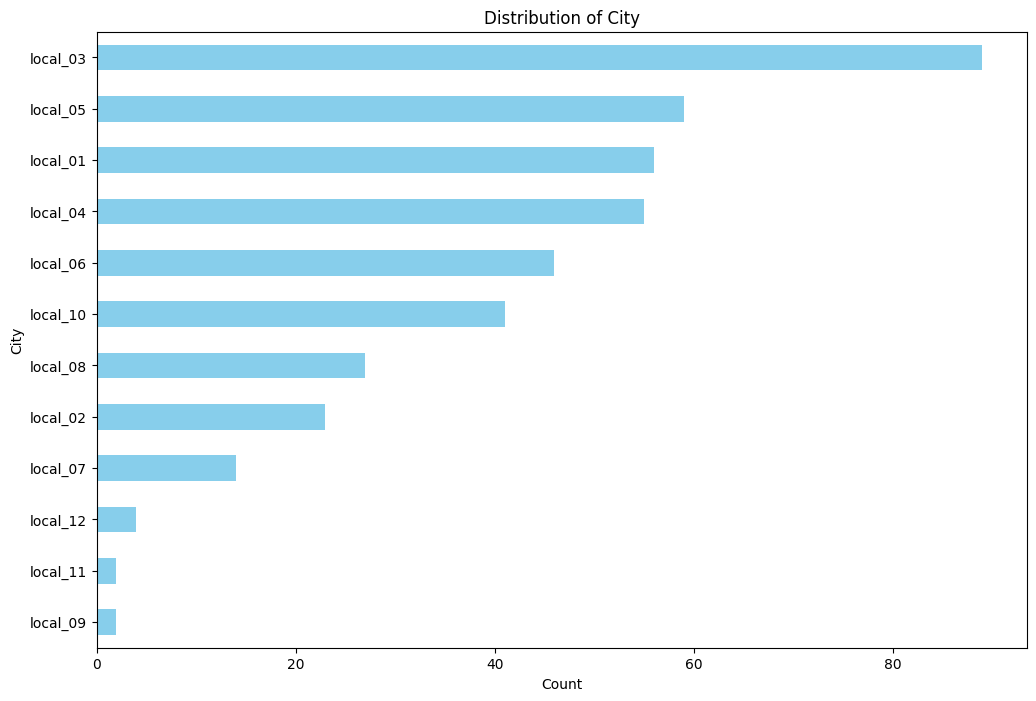

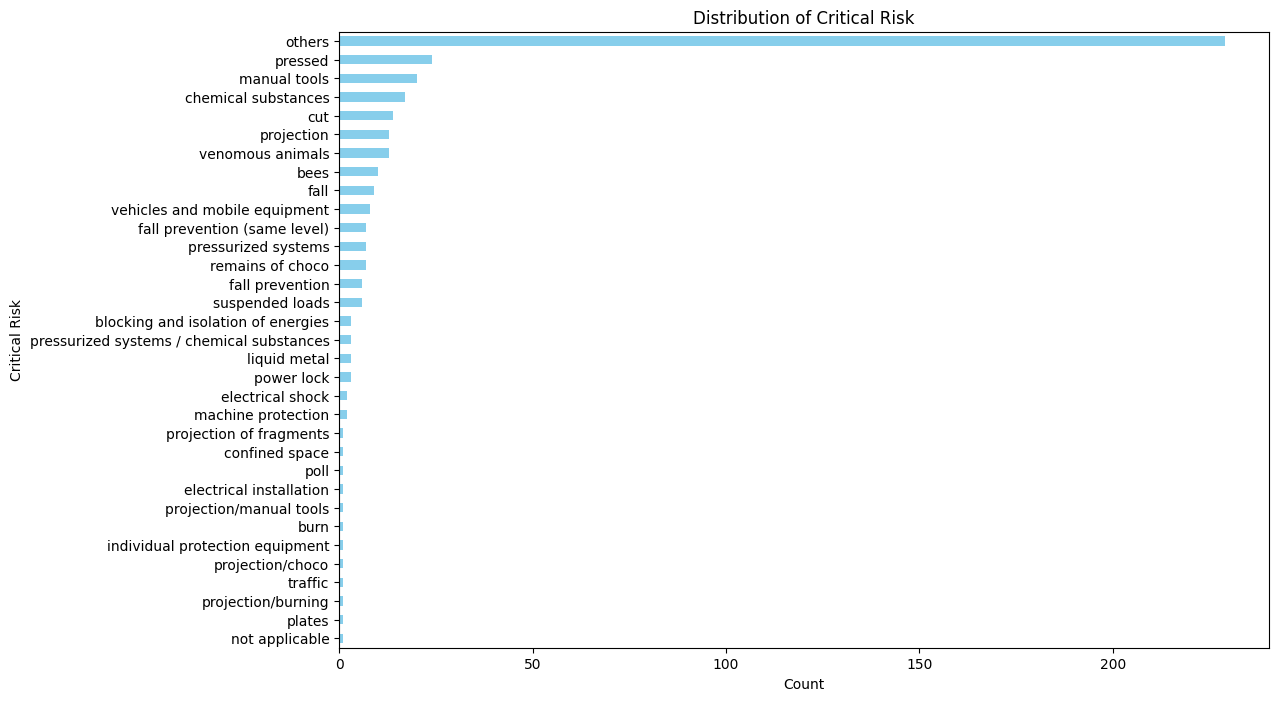

In [ ]:
plot_pie_chart(df,'country')
plot_pie_chart(df,'industry_sector')
plot_pie_chart(df,'accident_level')
plot_pie_chart(df,'potential_accident_level')
plot_pie_chart(df,'gender')
plot_pie_chart(df,'employee_type')
plot_pie_chart(df,'year')
plot_pie_chart(df,'month')
plot_pie_chart(df,'day')
plot_horizontal_bar_chart(df, "city")
plot_horizontal_bar_chart(df, "critical_risk")

### Insights from Univariate Analysis:

**Country Distribution:**
 - Majority of incidents occur in country_01, suggesting either higher industrial activity or weaker safety measures.
 - Country_03 has the least incidents, which might indicate stricter regulations or lower industrial activity.

**Industry Sector:**
 - Most accidents occur in the mining sector, indicating hazardous working conditions.
 - The "others" category has fewer accidents, which may represent industries with lower-risk activities.

**Accident Level:**
 - "Level I" accidents dominate, suggesting that most incidents are minor but frequent.
 - "Level V" accidents are rare, but they might be the most critical and life-threatening.

**Potential Accident Level:**
 - There is a gradual increase from Level I to Level VI, meaning some minor incidents had the potential to become severe.
 - If the majority of low-severity incidents have high potential risk, safety measures need reinforcement.

**Gender Distribution:**
 - Most accidents involve male employees, likely because more men work in high-risk jobs in industrial sectors.
 - Female employees have significantly fewer accidents, which might indicate less exposure to hazardous roles.

**Employee Type:**
 - Full-time employees experience the majority of accidents, as expected due to higher exposure.
 - Third-party workers have accidents too, suggesting possible gaps in safety training for contractors.

**Yearly Distribution:**
 - 2016 had the highest number of accidents, followed by a decline in 2017, suggesting possible safety improvements or reporting variations.
 - No clear increasing or decreasing trend across years, indicating that while safety measures may have had an impact, accidents are still frequent and need continuous monitoring.

**Monthly Distribution:**
 - February and April show peak accident occurrences, suggesting seasonal factors or increased industrial activity during those months.
 - Accident rates tend to be lower in July to September, possibly due to reduced industrial operations or improved preventive measures during that period.

**Day of the Week:**
 - Thursdays and Tuesdays have the highest accident counts, possibly due to midweek workload peaks or fatigue buildup.
 - Sundays and Mondays report fewer accidents, likely due to lower industrial activity or recovery from the weekend.

**City Distribution:**
 - Certain cities report significantly higher accidents, suggesting location-based risks (workload, infrastructure, policies, etc.).
 - If a few cities dominate the chart, companies should analyze safety measures in those locations.

**Critical Risk Categories:**
 - Some risks (like "fall" and "manual tools") are significantly more common, indicating core safety concerns.
 - "Others" has a large count, which might mean a need for better risk classification and reporting accuracy.


## Bivariate Analysis

In [ ]:
# function to plot count plot for bivariate analysis
def bivariate_analysis(df, x_col, hue_col, top_n=10):
    """
    Function to generate a count plot for bivariate analysis with top N categories
    and display a crosstab for numerical reference.

    Parameters:
    df (DataFrame): The dataset
    x_col (str): The column to be plotted on the x-axis
    hue_col (str): The column to be used as a hue (grouping)
    top_n (int): The number of top categories to display for x_col

    Returns:
    Displays a count plot and crosstab
    """
    # Get top N most frequent values in the x_col
    top_x_values = df[x_col].value_counts().nlargest(top_n).index

    # Filter dataset to include only rows with top X-axis categories
    filtered_df = df[df[x_col].isin(top_x_values)]

    # Check if filtering removed all rows
    if filtered_df.empty:
        print(f"Skipping '{x_col} vs. {hue_col}' as there are no top {top_n} categories in '{x_col}'.")
        return

    # Create a crosstab
    crosstab_result = pd.crosstab(filtered_df[x_col], filtered_df[hue_col])

    # Plot the count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x=x_col, hue=hue_col, palette="viridis")

    # Labels & Titles
    plt.xlabel(x_col.replace("_", " ").title())
    plt.ylabel("Count")
    plt.title(f"Bivariate Analysis: {x_col.replace('_', ' ').title()} vs. {hue_col.replace('_', ' ').title()} (Top {top_n})")
    plt.legend(title=hue_col.replace("_", " ").title(), loc="upper right")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    plt.show()

    # Display the crosstab
    print(f"\n🔹 Crosstab: {x_col.replace('_', ' ').title()} vs. {hue_col.replace('_', ' ').title()}")
    display(crosstab_result)

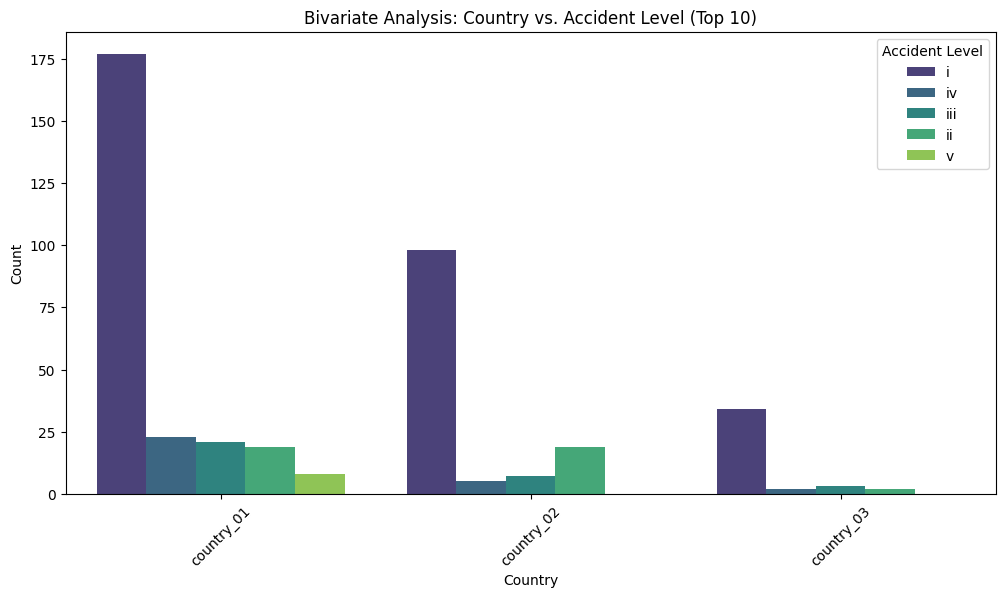


🔹 Crosstab: Country vs. Accident Level


accident_level,i,ii,iii,iv,v
country,,,,,
country_01,177,19,21,23,8
country_02,98,19,7,5,0
country_03,34,2,3,2,0


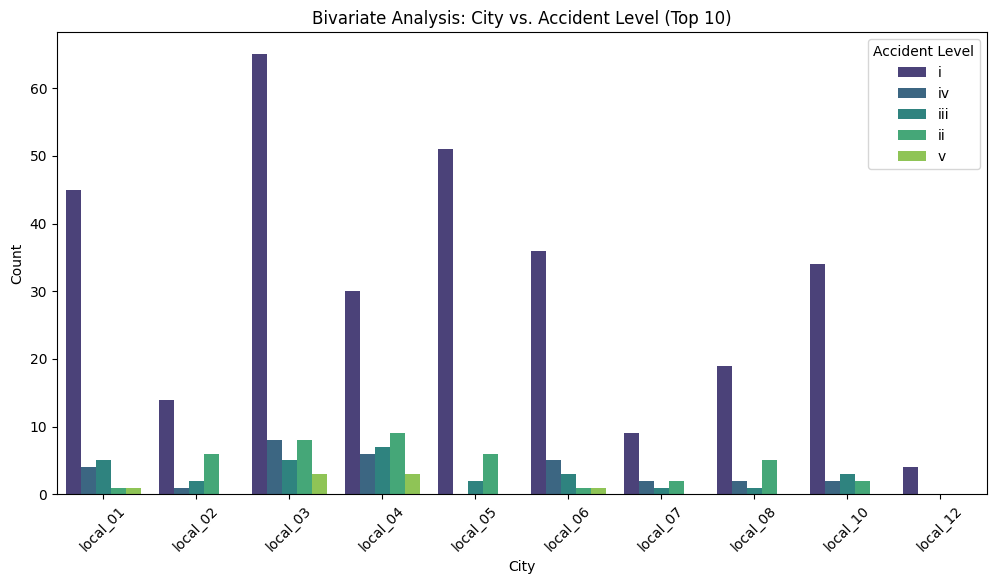


🔹 Crosstab: City vs. Accident Level


accident_level,i,ii,iii,iv,v
city,,,,,
local_01,45,1,5,4,1
local_02,14,6,2,1,0
local_03,65,8,5,8,3
local_04,30,9,7,6,3
local_05,51,6,2,0,0
local_06,36,1,3,5,1
local_07,9,2,1,2,0
local_08,19,5,1,2,0
local_10,34,2,3,2,0


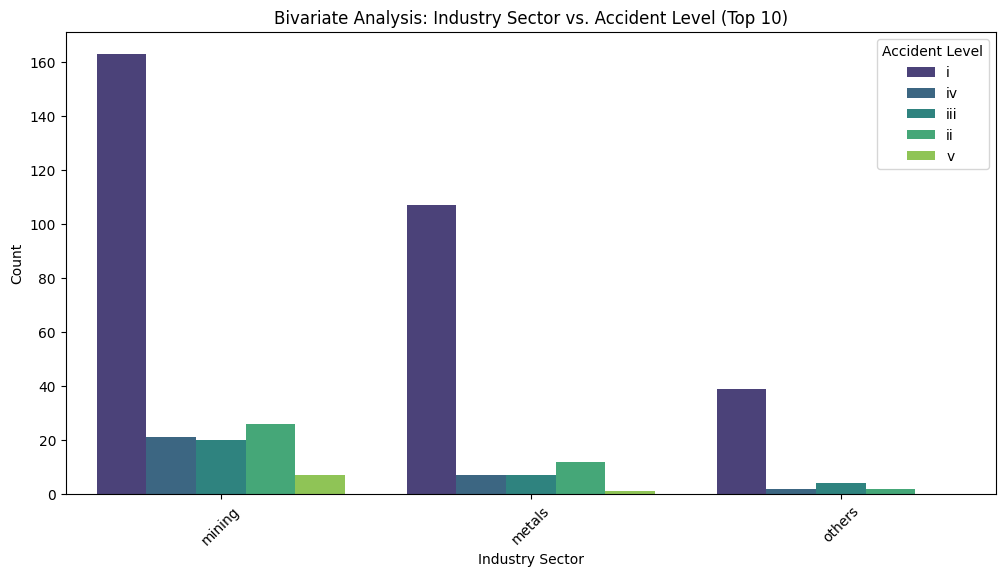


🔹 Crosstab: Industry Sector vs. Accident Level


accident_level,i,ii,iii,iv,v
industry_sector,,,,,
metals,107,12,7,7,1
mining,163,26,20,21,7
others,39,2,4,2,0


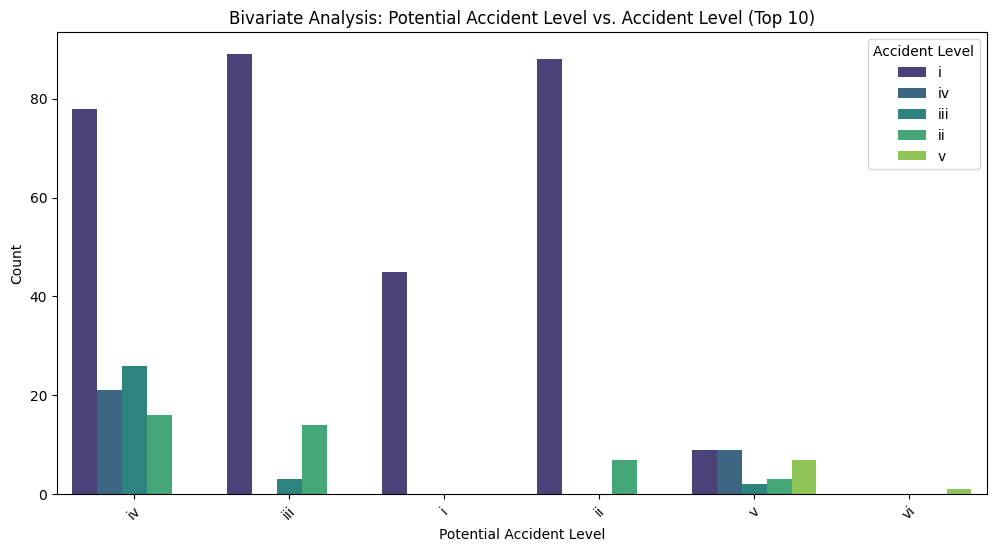


🔹 Crosstab: Potential Accident Level vs. Accident Level


accident_level,i,ii,iii,iv,v
potential_accident_level,,,,,
i,45,0,0,0,0
ii,88,7,0,0,0
iii,89,14,3,0,0
iv,78,16,26,21,0
v,9,3,2,9,7
vi,0,0,0,0,1


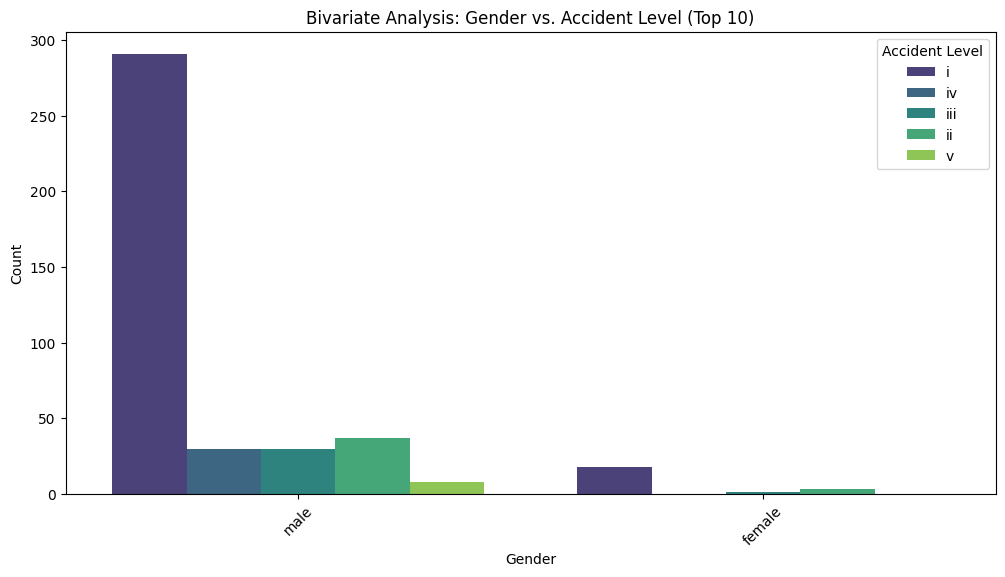


🔹 Crosstab: Gender vs. Accident Level


accident_level,i,ii,iii,iv,v
gender,,,,,
female,18,3,1,0,0
male,291,37,30,30,8


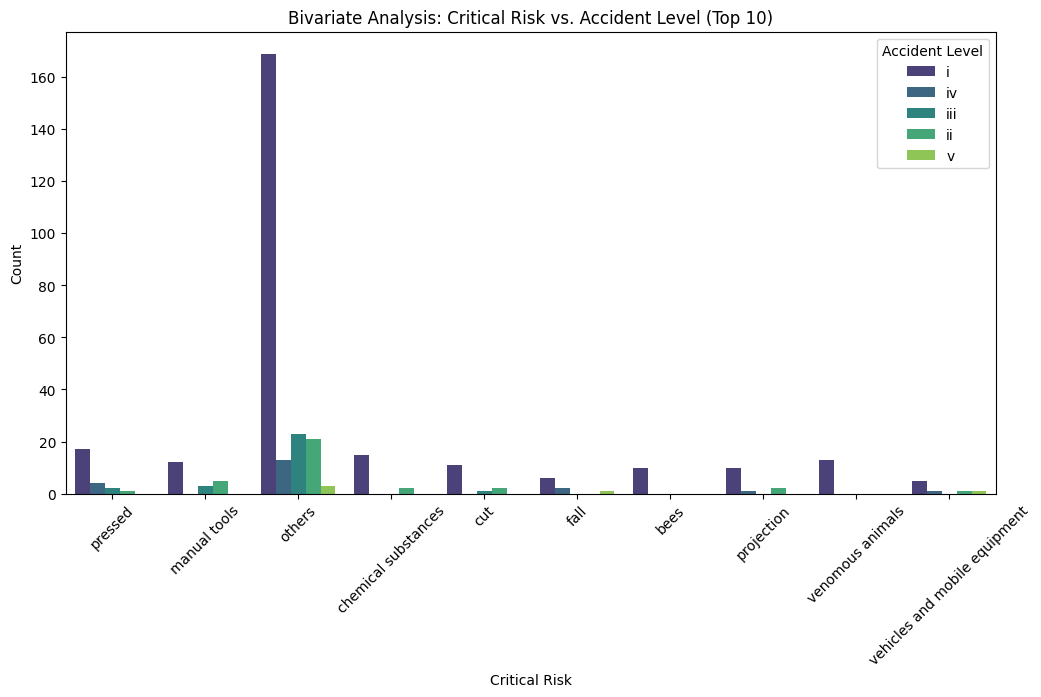


🔹 Crosstab: Critical Risk vs. Accident Level


accident_level,i,ii,iii,iv,v
critical_risk,,,,,
bees,10,0,0,0,0
chemical substances,15,2,0,0,0
cut,11,2,1,0,0
fall,6,0,0,2,1
manual tools,12,5,3,0,0
others,169,21,23,13,3
pressed,17,1,2,4,0
projection,10,2,0,1,0
vehicles and mobile equipment,5,1,0,1,1


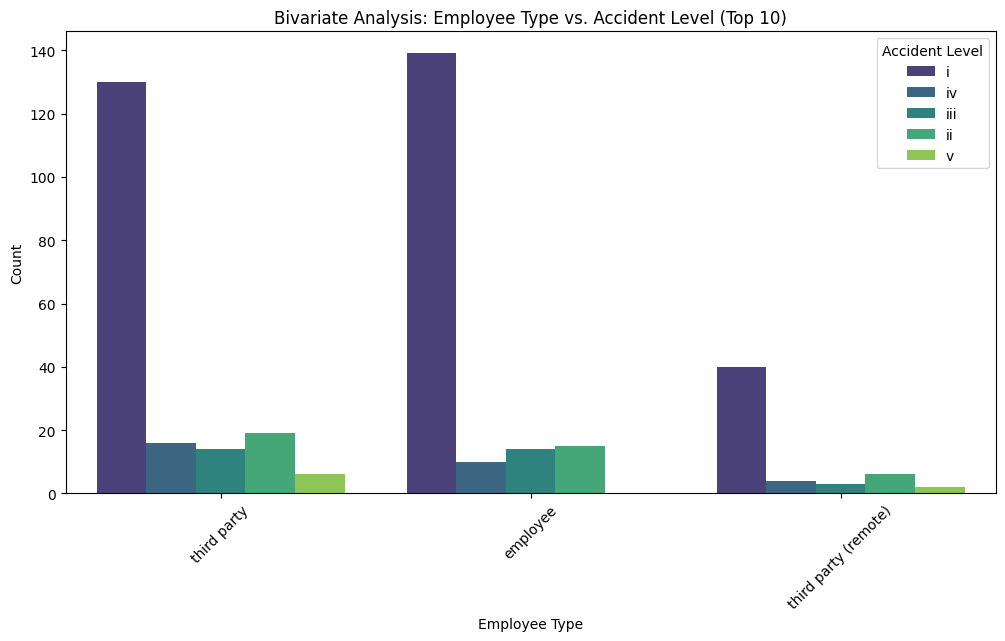


🔹 Crosstab: Employee Type vs. Accident Level


accident_level,i,ii,iii,iv,v
employee_type,,,,,
employee,139,15,14,10,0
third party,130,19,14,16,6
third party (remote),40,6,3,4,2


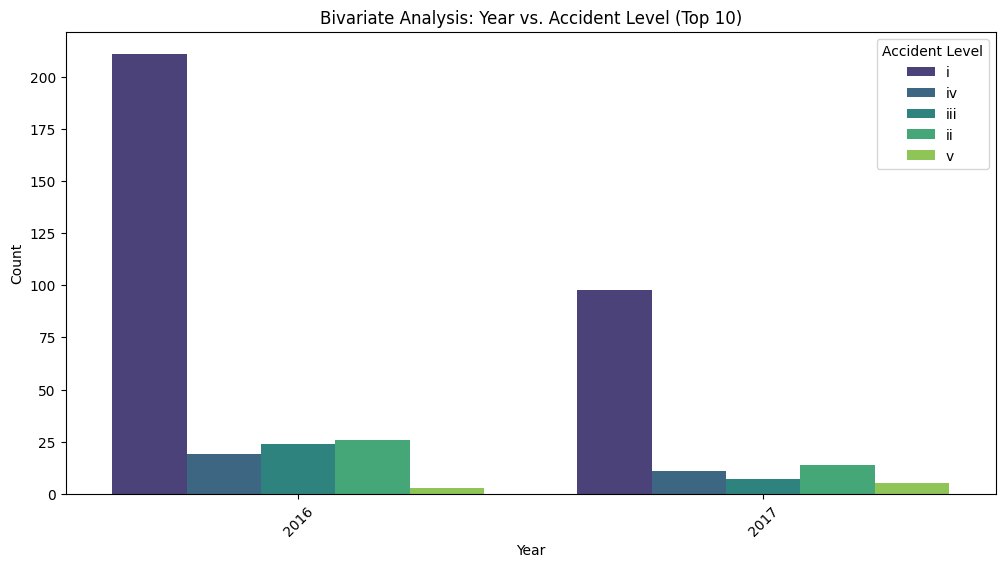


🔹 Crosstab: Year vs. Accident Level


accident_level,i,ii,iii,iv,v
year,,,,,
2016,211,26,24,19,3
2017,98,14,7,11,5


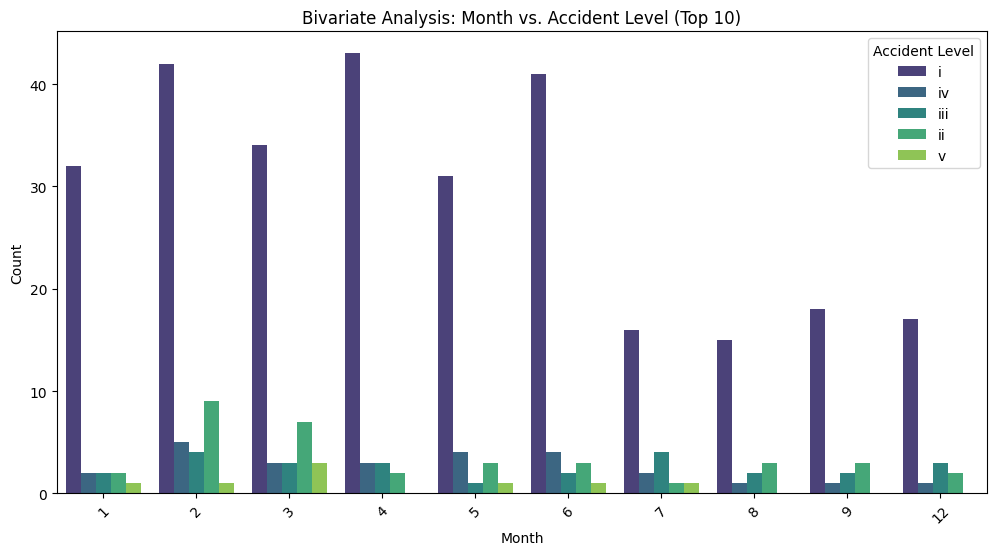


🔹 Crosstab: Month vs. Accident Level


accident_level,i,ii,iii,iv,v
month,,,,,
1,32,2,2,2,1
2,42,9,4,5,1
3,34,7,3,3,3
4,43,2,3,3,0
5,31,3,1,4,1
6,41,3,2,4,1
7,16,1,4,2,1
8,15,3,2,1,0
9,18,3,2,1,0


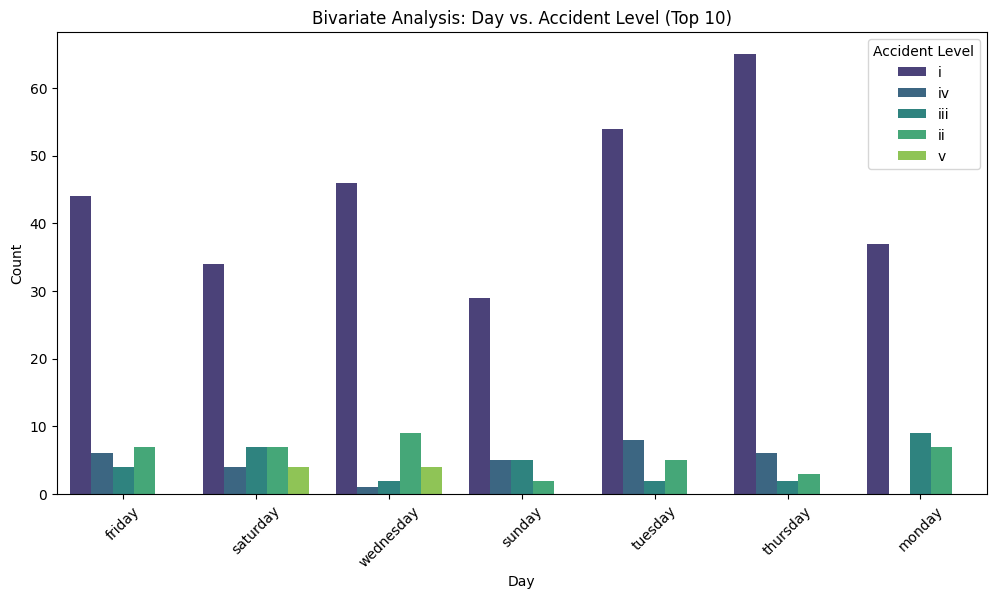


🔹 Crosstab: Day vs. Accident Level


accident_level,i,ii,iii,iv,v
day,,,,,
friday,44,7,4,6,0
monday,37,7,9,0,0
saturday,34,7,7,4,4
sunday,29,2,5,5,0
thursday,65,3,2,6,0
tuesday,54,5,2,8,0
wednesday,46,9,2,1,4


In [ ]:
bivariate_analysis(df, "country", "accident_level", top_n=10)
bivariate_analysis(df, "city", "accident_level", top_n=10)
bivariate_analysis(df, "industry_sector","accident_level",  top_n=10)
bivariate_analysis(df, "potential_accident_level","accident_level",  top_n=10)
bivariate_analysis(df, "gender", "accident_level", top_n=10)
bivariate_analysis(df, "critical_risk", "accident_level", top_n=10)
bivariate_analysis(df, "employee_type", "accident_level", top_n=10)
bivariate_analysis(df, "year", "accident_level", top_n=10)
bivariate_analysis(df, "month", "accident_level", top_n=10)
bivariate_analysis(df, "day", "accident_level", top_n=10)

### Insights from Bivariate Analysis:

**Country vs. Accident Level**
 - Country_01 has the highest number of accidents, particularly Level I and Level IV.
 - Country_03 has the lowest accident count, suggesting either better safety measures or lower industrial activity.

**City vs. Accident Level**
 - Local_03 and Local_05 report the most incidents, indicating possible safety concerns.
 - Certain cities have a higher proportion of severe accidents (Level IV and V), which might indicate high-risk work environments.

**Industry Sector vs. Accident Level**
 - The mining sector has the highest accident rate, with Level I and Level IV being the most common.
 - Metals industry also has frequent accidents, but slightly fewer severe cases than mining.

**Potential Accident Level vs. Accident Level**
 - Accidents with a high potential risk (Level V & VI) actually resulted in severe accidents (Level IV and V).
 - Most lower-level potential accidents (Level I, II) remained non-severe, indicating proper safety handling in those cases.

**Gender vs. Accident Level**
 - Male employees dominate the accident counts (~95%), which aligns with industrial workforce distribution.
 - Female employees have very few reported accidents, suggesting they may have roles with lower exposure to risks.

**Critical Risk vs. Accident Level**
 - The "Others" category has the highest number of accidents, which may indicate poor classification or multiple risks.
 - "Pressed" and "Manual Tools" risks contribute to Level IV and V accidents, highlighting workplace safety gaps.

**Employee Type vs. Accident Level**
 - Full-time employees face the most accidents, but third-party workers also experience a significant number.
 - Remote third-party workers still have incidents, meaning safety protocols should apply to all employee types.

**Year vs. Accident Level**
 - 2016 had the highest accident frequency, with a higher proportion of Level IV and V incidents.
 - 2017 saw a decrease in accidents, which may indicate improved safety measures or changes in reporting.

**Month vs. Accident Level**
 - February and April show the highest accident counts, possibly due to seasonal workload spikes.
 - July to September have lower accident counts, which could be due to reduced operations or improved safety.

**Day vs. Accident Level**
 - Thursdays and Tuesdays report the most accidents, suggesting these days might have higher workload or riskier tasks.
 - Fridays and Saturdays see more severe accidents (Level IV & V), possibly due to fatigue before weekends.


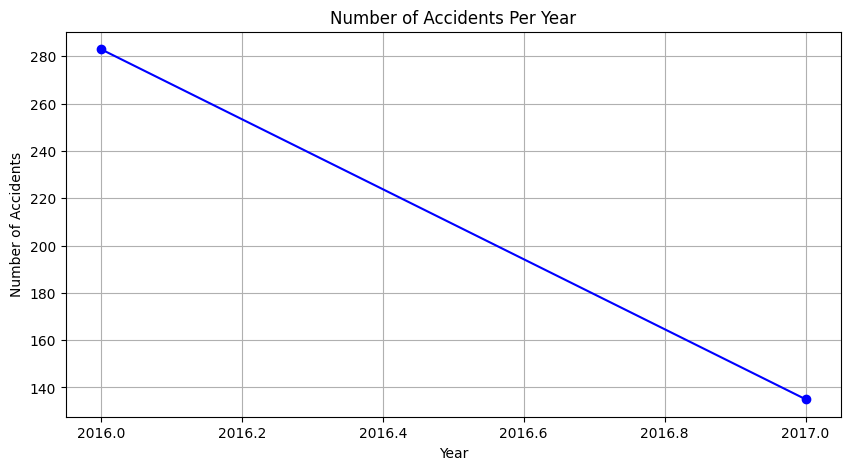

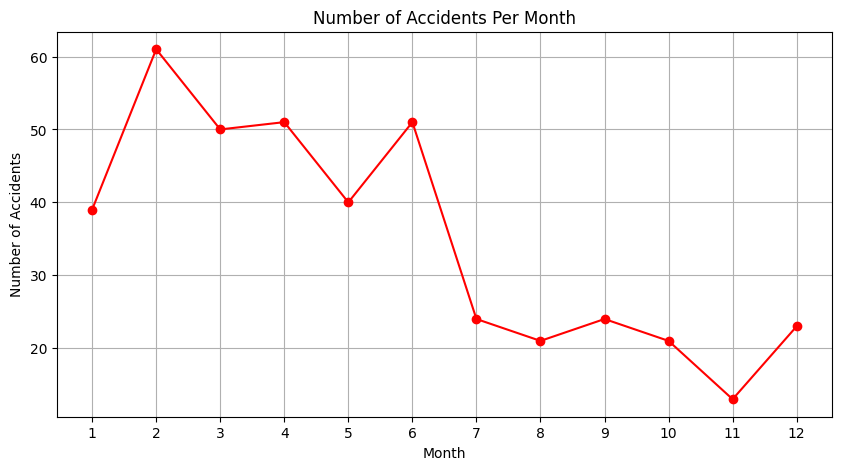

In [ ]:
# Aggregate number of incidents per year and month
yearly_trend = df.groupby("year").size()
monthly_trend = df.groupby("month").size()

# Plot yearly trend
plt.figure(figsize=(10, 5))
yearly_trend.plot(marker='o', color='b', linestyle='-')
plt.title("Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

# Plot monthly trend
plt.figure(figsize=(10, 5))
monthly_trend.plot(marker='o', color='r', linestyle='-')
plt.title("Number of Accidents Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Yearly Accident Distribution**
 - 2016 had the highest number of accidents (283 cases), while 2017 had significantly fewer (135 cases).
 - This suggests either a decline in reported incidents or actual safety improvements.
 - The steep decline from 2016 to 2017 may indicate the impact of new regulations, safety training, or industrial slowdowns.

**Monthly Accident Distribution**
 - February (61 cases) and April-June (~50 cases each) had the highest number of incidents.
 - This could indicate seasonal hazards or higher workloads during these months.
 - November (13 cases) and October (21 cases) had the lowest accident counts.
 - Possible explanations: lower industrial activity, better preventive measures, or reporting variations.


In [ ]:
ps = nltk.PorterStemmer()

def stem_words(text):
    # Tokenize the text
    tokens = text.split()
    # Stem each word
    stemmed_text = ' '.join([ps.stem(word) for word in tokens])
    return stemmed_text

## Data Preprocessing

In [ ]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    """
    Function to clean text by:
    1. Converting to lowercase
    2. Removing special characters (while keeping contractions)
    3. Tokenizing words
    4. Removing stopwords
    """
    if not isinstance(text, str):
        return ""

    # Remove unwanted special characters but keep apostrophes
    text = text.lower().strip()  # Convert to lowercase and strip spaces
    text = re.sub(r"[^a-zA-Z0-9' ]", '', text)  # Retains contractions & numbers

    # Tokenization
    words = word_tokenize(text)

    # Stopword removal
    filtered_words = [word for word in words if word not in stop_words]

    return " ".join(filtered_words)



# Apply text preprocessing safely
df["cleaned_description"] = df["description"].fillna("").apply(preprocess_text)
df['cleaned_description']=df['cleaned_description'].apply(stem_words)

# Save cleaned text to a CSV file
df.to_csv("/content/drive/MyDrive/AIMLCourse/CapstoneProject/cleaned_text_dataset.csv", index=False)

print("Cleaned text saved successfully as 'cleaned_text_dataset.csv'.")

# Display first 10 rows
df[["description", "cleaned_description"]].head(10)


Cleaned text saved successfully as 'cleaned_text_dataset.csv'.


,description,cleaned_description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",substat milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",945 approxim nv 1880 cx695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr cristbal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anticlockwis direct leav key bolt hit palm left hand caus injuri
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",approxim 1145 circumst mechan anthoni group leader eduardo eric fernndezinjuredth three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 106 meter high hit instep right foot worker caus injuri describ
5,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes.",unload oper ustulado bag need unclog discharg mouth silo truck perform procedur maneuv unhook hose without total depressuris mouth project ustulado powder collabor caus irrit eye
6,"The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      418 non-null    datetime64[ns]
 1   country                   418 non-null    object        
 2   city                      418 non-null    object        
 3   industry_sector           418 non-null    object        
 4   accident_level            418 non-null    object        
 5   potential_accident_level  418 non-null    object        
 6   gender                    418 non-null    object        
 7   employee_type             418 non-null    object        
 8   critical_risk             418 non-null    object        
 9   description               418 non-null    object        
 10  year                      418 non-null    int32         
 11  month                     418 non-null    int32         
 12  day                       4

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['accident_level_encoded'] = label_encoder.fit_transform(df['accident_level'])

In [ ]:
# Train-Test Split
# Define the target variable and features
target_column = 'accident_level_encoded'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and temporary (validation + test) sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split the temporary set into validation and test sets with stratification
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the shapes to confirm the splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (292, 14) (292,)
Validation set: (63, 14) (63,)
Test set: (63, 14) (63,)


In [ ]:
# # Flatten the cleaned descriptions into a single list of words
# all_words = " ".join(X_train["cleaned_description"]).split()

# # Count word frequencies
# word_counts = Counter(all_words)

# # Generate word cloud from the word frequency data
# wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# # Plot the word cloud
# plt.figure(figsize=(12, 6))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")  # Hide axes
# plt.title("Word Cloud of Most Frequent Words")
# plt.show()

# # Convert to DataFrame for easy analysis
# word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Count"]).sort_values(by="Count", ascending=False)

# # Plot the Top 20 Most Frequent Words
# plt.figure(figsize=(12, 6))
# plt.bar(word_freq_df["Word"].head(20), word_freq_df["Count"].head(20))
# plt.title("Top 20 Most Frequent Words in Cleaned Descriptions")
# plt.xlabel("Words")
# plt.ylabel("Frequency")
# plt.xticks(rotation=45)
# plt.show()


In [ ]:
# # TF-IDF Embeddings
# tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
# X_train["tfidf"] = list(tfidf_vectorizer.fit_transform(X_train["cleaned_description"]).toarray())
# X_val["tfidf"] = list(tfidf_vectorizer.transform(X_val["cleaned_description"]).toarray())
# X_test["tfidf"] = list(tfidf_vectorizer.transform(X_test["cleaned_description"]).toarray())

# # Word2Vec Embeddings
# X_train["tokenized_text"] = X_train["cleaned_description"].apply(lambda x: x.split())
# X_val["tokenized_text"] = X_val["cleaned_description"].apply(lambda x: x.split())
# X_test["tokenized_text"] = X_test["cleaned_description"].apply(lambda x: x.split())

# word2vec_model = Word2Vec(sentences=X_train["tokenized_text"].tolist(), vector_size=100, window=5, min_count=1, workers=4, sg=1)

# def get_word2vec_embedding(words, model):
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# X_train["word2vec"] = X_train["tokenized_text"].apply(lambda x: get_word2vec_embedding(x, word2vec_model))
# X_val["word2vec"] = X_val["tokenized_text"].apply(lambda x: get_word2vec_embedding(x, word2vec_model))
# X_test["word2vec"] = X_test["tokenized_text"].apply(lambda x: get_word2vec_embedding(x, word2vec_model))

# # GloVe Embeddings
# glove_path = "/content/drive/MyDrive/AIMLCourse/ProjectNLP/glove.6B.100d.txt.word2vec"  # Ensure this file is available
# glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)

# def get_glove_embedding(words, model):
#     word_vectors = [model[word] for word in words if word in model]
#     return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# X_train["glove"] = X_train["tokenized_text"].apply(lambda x: get_glove_embedding(x, glove_model))
# X_val["glove"] = X_val["tokenized_text"].apply(lambda x: get_glove_embedding(x, glove_model))
# X_test["glove"] = X_test["tokenized_text"].apply(lambda x: get_glove_embedding(x, glove_model))

# # Convert Embeddings to NumPy
# X_train_tfidf = np.vstack(X_train["tfidf"].values)
# X_val_tfidf = np.vstack(X_val["tfidf"].values)
# X_test_tfidf = np.vstack(X_test["tfidf"].values)

# X_train_w2v = np.vstack(X_train["word2vec"].values)
# X_val_w2v = np.vstack(X_val["word2vec"].values)
# X_test_w2v = np.vstack(X_test["word2vec"].values)

# X_train_glove = np.vstack(X_train["glove"].values)
# X_val_glove = np.vstack(X_val["glove"].values)
# X_test_glove = np.vstack(X_test["glove"].values)

# # Encode Labels
# label_encoder = LabelEncoder()
# y_train_enc = label_encoder.fit_transform(y_train)
# y_val_enc = label_encoder.transform(y_val)
# y_test_enc = label_encoder.transform(y_test)

# # Save Embeddings as CSV
# def save_embeddings_to_csv(X_train, X_val, X_test, file_prefix):
#     pd.DataFrame(X_train).to_csv(f"{file_prefix}_train.csv", index=False)
#     pd.DataFrame(X_val).to_csv(f"{file_prefix}_val.csv", index=False)
#     pd.DataFrame(X_test).to_csv(f"{file_prefix}_test.csv", index=False)

# # Save TF-IDF, Word2Vec, GloVe embeddings
# save_embeddings_to_csv(X_train_tfidf, X_val_tfidf, X_test_tfidf, "tfidf")
# save_embeddings_to_csv(X_train_w2v, X_val_w2v, X_test_w2v, "word2vec")
# save_embeddings_to_csv(X_train_glove, X_val_glove, X_test_glove, "glove")

# # Save labels
# pd.DataFrame(y_train_enc).to_csv("train_labels.csv", index=False, header=["label"])
# pd.DataFrame(y_val_enc).to_csv("val_labels.csv", index=False, header=["label"])
# pd.DataFrame(y_test_enc).to_csv("test_labels.csv", index=False, header=["label"])

# print("\nTF-IDF, Word2Vec & GloVe Embeddings Successfully Saved as CSV!")

In [ ]:
# # Load Embeddings from CSV
# def load_embeddings_from_csv(file_prefix):
#     X_train = pd.read_csv(f"{file_prefix}_train.csv").values
#     X_val = pd.read_csv(f"{file_prefix}_val.csv").values
#     X_test = pd.read_csv(f"{file_prefix}_test.csv").values
#     return X_train, X_val, X_test

# # Load TF-IDF, Word2Vec, GloVe embeddings
# X_train_tfidf, X_val_tfidf, X_test_tfidf = load_embeddings_from_csv("tfidf")
# X_train_w2v, X_val_w2v, X_test_w2v = load_embeddings_from_csv("word2vec")
# X_train_glove, X_val_glove, X_test_glove = load_embeddings_from_csv("glove")

# # Load labels
# y_train_enc = pd.read_csv("train_labels.csv").values.ravel()
# y_val_enc = pd.read_csv("val_labels.csv").values.ravel()
# y_test_enc = pd.read_csv("test_labels.csv").values.ravel()

# print("\nEmbeddings and Labels Successfully Loaded from CSV!")

In [ ]:
# # Check the Shape of Embeddings
# print("\nShape of Embeddings:")
# print("TF-IDF Shape - Train:", X_train_tfidf.shape, "| Val:", X_val_tfidf.shape, "| Test:", X_test_tfidf.shape)
# print("Word2Vec Shape - Train:", X_train_w2v.shape, "| Val:", X_val_w2v.shape, "| Test:", X_test_w2v.shape)
# print("GloVe Shape - Train:", X_train_glove.shape, "| Val:", X_val_glove.shape, "| Test:", X_test_glove.shape)
# print("Labels Shape - Train:", y_train_enc.shape, "| Val:", y_val_enc.shape, "| Test:", y_test_enc.shape)

# # Check for NaN (Missing) Values in Embeddings
# print("\nChecking for NaN Values:")
# print("TF-IDF NaN - Train:", np.isnan(X_train_tfidf).sum(), "| Val:", np.isnan(X_val_tfidf).sum(), "| Test:", np.isnan(X_test_tfidf).sum())
# print("Word2Vec NaN - Train:", np.isnan(X_train_w2v).sum(), "| Val:", np.isnan(X_val_w2v).sum(), "| Test:", np.isnan(X_test_w2v).sum())
# print("GloVe NaN - Train:", np.isnan(X_train_glove).sum(), "| Val:", np.isnan(X_val_glove).sum(), "| Test:", np.isnan(X_test_glove).sum())

# # Check for Zero Embeddings
# print("\nChecking for Zero Vectors:")
# print("TF-IDF Zero Vectors - Train:", np.all(X_train_tfidf == 0, axis=1).sum(),
#       "| Val:", np.all(X_val_tfidf == 0, axis=1).sum(),
#       "| Test:", np.all(X_test_tfidf == 0, axis=1).sum())

# print("Word2Vec Zero Vectors - Train:", np.all(X_train_w2v == 0, axis=1).sum(),
#       "| Val:", np.all(X_val_w2v == 0, axis=1).sum(),
#       "| Test:", np.all(X_test_w2v == 0, axis=1).sum())

# print("GloVe Zero Vectors - Train:", np.all(X_train_glove == 0, axis=1).sum(),
#       "| Val:", np.all(X_val_glove == 0, axis=1).sum(),
#       "| Test:", np.all(X_test_glove == 0, axis=1).sum())

In [ ]:
# # Standardize Embeddings (Scaling for Better Model Performance)
# scaler_tfidf, scaler_w2v, scaler_glove = StandardScaler(), StandardScaler(), StandardScaler()

# X_train_tfidf = scaler_tfidf.fit_transform(X_train_tfidf)
# X_val_tfidf = scaler_tfidf.transform(X_val_tfidf)
# X_test_tfidf = scaler_tfidf.transform(X_test_tfidf)

# X_train_w2v = scaler_w2v.fit_transform(X_train_w2v)
# X_val_w2v = scaler_w2v.transform(X_val_w2v)
# X_test_w2v = scaler_w2v.transform(X_test_w2v)

# X_train_glove = scaler_glove.fit_transform(X_train_glove)
# X_val_glove = scaler_glove.transform(X_val_glove)
# X_test_glove = scaler_glove.transform(X_test_glove)

# print("\nAll Embeddings Processed, Validated, Scaled Successfully!")

## Model Training and Tuning
### Logistic Regression

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate Logistic Regression
# def train_evaluate_logistic(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains Logistic Regression and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: Logistic Regression | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate Logistic Regression on Each Embedding
# logistic_results = {}
# logistic_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining Logistic Regression for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_logistic(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     logistic_results[embedding] = f1_score_val
#     logistic_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# logistic_results_df = pd.DataFrame(logistic_results, index=["Logistic Regression"]).T
# print("\nModel Performance Comparison:\n", logistic_results_df)

# # Select Best Model Based on F1-Score
# best_embedding_logistic = logistic_results_df["Logistic Regression"].idxmax()
# best_logistic_model = logistic_models[best_embedding_logistic]

# print(f"\nBest Model: Logistic Regression | Best Embedding: {best_embedding_logistic}")

### Logistic Regression with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for Logistic Regression tuning
# param_grid = {
#     'C': [0.01, 0.1, 1, 10],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Type of regularization
#     'solver': ['liblinear', 'saga']  # Solvers for logistic regression
# }

# # Function to train and evaluate Logistic Regression with tuning
# def train_evaluate_logistic_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains Logistic Regression with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for Logistic Regression | Embedding: {embedding_name}")

#     logistic_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=logistic_model,
#         param_grid=param_grid,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: Logistic Regression | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate Logistic Regression with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining Logistic Regression for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_logistic_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["Logistic Regression"]).T
# print("\nTuned Model Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["Logistic Regression"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: Logistic Regression | Best Embedding: {best_embedding}")

### SVM

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate SVM
# def train_evaluate_svm(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains SVC and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = SVC(class_weight="balanced", kernel='rbf', probability=True, random_state=42)
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: SVM | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate SVM on Each Embedding
# svm_results = {}
# svm_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining SVM for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_svm(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     svm_results[embedding] = f1_score_val
#     svm_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# svm_results_df = pd.DataFrame(svm_results, index=["SVM"]).T
# print("\nModel Performance Comparison:\n", svm_results_df)

# # Select Best Model Based on F1-Score
# best_embedding_svm = svm_results_df["SVM"].idxmax()
# best_svm_model = svm_models[best_embedding_svm]

# print(f"\nBest Model: SVM | Best Embedding: {best_embedding_svm}")

### SVM with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for SVM tuning
# param_grid = {
#     'C': [0.01, 0.1, 1, 10],  # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel type
#     'gamma': ['scale', 'auto']  # Kernel coefficient
# }

# # Function to train and evaluate SVM with tuning
# def train_evaluate_svm_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains SVM with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for SVM | Embedding: {embedding_name}")

#     svm_model = SVC(class_weight="balanced", random_state=42)

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=svm_model,
#         param_grid=param_grid,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: SVM | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate SVM with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining SVM for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_svm_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["SVM"]).T  # Transpose for better readability
# print("\nTuned Model Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["SVM"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: SVM | Best Embedding: {best_embedding}")

### LightGBM

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate LightGBM
# def train_evaluate_LGBM(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains LightGBM and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = LGBMClassifier(class_weight="balanced", random_state=42, verbose=-1)
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: LightGBM | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate LightGBM on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining LightGBM for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_LGBM(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["LightGBM"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["LightGBM"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: LightGBM | Best Embedding: {best_embedding}")

### LightGBM with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for LightGBM tuning
# param_grid = {
#     'n_estimators': [25, 50, 75],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.1],  # Step size shrinkage
#     'max_depth': [12, 9],  # Maximum depth of trees
#     'num_leaves': [60, 50, 40],  # Number of leaves in each tree
#     'min_child_samples': [5, 4]  # Minimum number of data points per leaf
# }

# # Function to train and evaluate LightGBM with tuning
# def train_evaluate_LGBM_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains LightGBM with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for LightGBM | Embedding: {embedding_name}")

#     lgbm_model = LGBMClassifier(class_weight="balanced", random_state=42, verbose=-1)

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=lgbm_model,
#         param_grid=param_grid,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: LightGBM | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate LightGBM with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining LightGBM for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_LGBM_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["LightGBM"]).T  # Transpose for better readability
# print("\nTuned Model Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["LightGBM"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: LightGBM | Best Embedding: {best_embedding}")

### XGBoost

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate XGBoost
# def train_evaluate_XGBoost(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains XGBoost and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = XGBClassifier(use_label_encoder=False, eval_metric=["auc"], random_state=42)
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: XGBoost | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate XGBoost on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining XGBoost for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_XGBoost(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["XGBoost"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["XGBoost"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: XGBoost | Best Embedding: {best_embedding}")

### XGBoost with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for XGBoost tuning
# param_grid = {
#     'n_estimators': [150, 200],  # Number of boosting rounds
#     'max_depth': [6, 7],  # Maximum depth of trees
#     'learning_rate': [0.1, 0.2, 0.05],  # Step size shrinkage
#     'subsample': [0.6, 0.7],  # Fraction of samples used per tree
#     'colsample_bytree': [1.0, 1.2],  # Fraction of features per tree
#     'min_child_weight': [1, 2]
# }

# # Function to train and evaluate XGBoost with tuning
# def train_evaluate_XGBoost_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains XGBoost with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for XGBoost | Embedding: {embedding_name}")

#     xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=xgb_model,
#         param_grid=param_grid,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: XGBoost | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate XGBoost with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining XGBoost for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_XGBoost_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model


# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["XGBoost"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["XGBoost"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: XGBoost | Best Embedding: {best_embedding}")

### AdaBoost

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate AdaBoost
# def train_evaluate_AdaBoost(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains AdaBoost and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = AdaBoostClassifier(
#         estimator=DecisionTreeClassifier(max_depth=3),  # Weak learner
#         n_estimators=200,  # Number of boosting rounds
#         learning_rate=0.5,  # Controls estimator contribution
#         random_state=42
#     )
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: AdaBoost | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate AdaBoost on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining AdaBoost for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_AdaBoost(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["AdaBoost"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["AdaBoost"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: AdaBoost | Best Embedding: {best_embedding}")

### AdaBoost with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for AdaBoost tuning
# param_grid_adaboost = {
#     'n_estimators': [50, 100, 200],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Controls the weight of weak learners
#     'estimator__max_depth': [1, 3, 5]  # Depth of base Decision Tree
# }

# # Function to train and evaluate AdaBoost with tuning
# def train_evaluate_AdaBoost_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains AdaBoost with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for AdaBoost | Embedding: {embedding_name}")

#     base_estimator = DecisionTreeClassifier(random_state=42)  # Weak learner

#     adaboost_model = AdaBoostClassifier(
#         estimator=base_estimator,
#         random_state=42
#     )

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=adaboost_model,
#         param_grid=param_grid_adaboost,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')
#     cm = confusion_matrix(y_val, y_pred_val)

#     print(f"\nModel: AdaBoost | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate AdaBoost with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining AdaBoost for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_AdaBoost_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["AdaBoost"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["AdaBoost"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: AdaBoost | Best Embedding: {best_embedding}")

### RandomForest

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define function to train and evaluate RandomForest
# def train_evaluate_RF(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains RandomForest and evaluates using Weighted F1-score and Confusion Matrix."""

#     model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
#     model.fit(X_train, y_train)

#     y_pred_val = model.predict(X_val)

#     f1 = f1_score(y_val, y_pred_val, average='weighted')

#     print(f"\nModel: RandomForest | Embedding: {embedding_name}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return model, f1

# # Train and Evaluate RandomForest on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining RandomForest for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_RF(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["RandomForest"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["RandomForest"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: RandomForest | Best Embedding: {best_embedding}")

### RandomForest with Hyperparameter Tuning

In [ ]:
# # Extract unique class labels
# labels = sorted(set(y_train_enc))

# # Define hyperparameter grid for RandomForest tuning
# param_grid = {
#     'n_estimators': [100, 300, 400],  # Number of trees
#     'max_depth': [None, 10, 30],  # Maximum depth of trees
#     'min_samples_split': [5, 10],  # Minimum samples required to split a node
#     'min_samples_leaf': [4, 8],  # Minimum samples required at a leaf node
#     'bootstrap': [True]  # Whether to use bootstrap sampling
# }

# # Function to train and evaluate RandomForest with tuning
# def train_evaluate_RF_tuning(X_train, X_val, y_train, y_val, embedding_name):
#     """Trains RandomForest with GridSearch and evaluates using Weighted F1-score and Confusion Matrix."""

#     print(f"\nHyperparameter tuning for RandomForest | Embedding: {embedding_name}")

#     rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=rf_model,
#         param_grid=param_grid,
#         scoring='f1_weighted',
#         cv=3,  # 3-fold cross-validation
#         verbose=1,
#         n_jobs=-1  # Use all available CPU cores
#     )

#     grid_search.fit(X_train, y_train)

#     # Get best parameters and best model
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     # Evaluate on validation set
#     y_pred_val = best_model.predict(X_val)
#     f1 = f1_score(y_val, y_pred_val, average='weighted')

#     print(f"\nModel: RandomForest | Embedding: {embedding_name}")
#     print(f"Best Hyperparameters: {best_params}")
#     print(f"Weighted F1-Score: {f1:.4f}")

#     # Generate Confusion Matrices
#     fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#     axs = axs.flatten()

#     # Train Confusion Matrix
#     train_cm = pd.DataFrame(
#         confusion_matrix(y_train, best_model.predict(X_train), labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(train_cm, annot=True, ax=axs[0], cmap="Blues", fmt="d")
#     axs[0].set_title("Train Confusion Matrix")

#     # Validation Confusion Matrix
#     val_cm = pd.DataFrame(
#         confusion_matrix(y_val, y_pred_val, labels=labels),
#         index=[f"Actual {i}" for i in labels],
#         columns=[f"Predict {i}" for i in labels],
#     )
#     sns.heatmap(val_cm, annot=True, ax=axs[1], cmap="Oranges", fmt="d")
#     axs[1].set_title("Validation Confusion Matrix")

#     plt.show()

#     print("Classification Report:\n", classification_report(y_val, y_pred_val))
#     print("-" * 50)

#     return best_model, f1

# # Train and Evaluate RandomForest with Tuning on Each Embedding
# results = {}
# trained_models = {}

# for embedding, X_train_emb, X_val_emb in zip(
#     ["TF-IDF", "Word2Vec", "GloVe"],
#     [X_train_tfidf, X_train_w2v, X_train_glove],
#     [X_val_tfidf, X_val_w2v, X_val_glove]
# ):
#     print(f"\nTraining RandomForest for {embedding} embeddings...")
#     model, f1_score_val = train_evaluate_RF_tuning(X_train_emb, X_val_emb, y_train_enc, y_val_enc, embedding)
#     results[embedding] = f1_score_val
#     trained_models[embedding] = model  # Store trained model

# # Display Model Performance as DataFrame
# results_df = pd.DataFrame(results, index=["RandomForest"]).T
# print("\nModel Performance Comparison:\n", results_df)

# # Select Best Model Based on F1-Score
# best_embedding = results_df["RandomForest"].idxmax()
# best_model = trained_models[best_embedding]

# print(f"\nBest Model: RandomForest | Best Embedding: {best_embedding}")


### 📌 Insights from Model Performance and Best Model Selection

#### **1️⃣ General Model Performance Trends**
- **Random Forest (TF-IDF) emerged as the best model** because it **recognizes all classes better** than other models.
- **XGBoost (TF-IDF) and LightGBM (Word2Vec) were strong competitors** but still struggled with class imbalance.

---

#### **2️⃣ Class Imbalance Problem Observed**
- The dataset is **highly imbalanced**, with **class 0 dominating the predictions**.
- Models like **XGBoost and AdaBoost heavily favor class 0**, resulting in **poor recall for minority classes (1, 2, 3, and 4)**.
- **Random Forest (TF-IDF) showed better generalization across classes**, making it a **more balanced model**.

---

#### **3️⃣ Model Comparison Based on Weighted F1-Score**
| **Model**           | **Best Embedding** | **Weighted F1-Score** | **Class Balance** |
|---------------------|------------------|----------------------|-------------------|
| **Logistic Regression** | Word2Vec      | 0.6163               | ❌ Struggles with class imbalance, overpredicts class 0 |
| **SVM**            | TF-IDF           | 0.6163               | ❌ Poor recognition of minority classes |
| **LightGBM**        | TF-IDF          | 0.6141               | ⚠️ Struggles with class 1, 2, 3 |
| **XGBoost**        | Word2Vec         | 0.6220           | ❌ Overfits class 0 |
| **AdaBoost**        | Glove           | 0.6141               | ⚠️ Slight overfitting on class 0 |
| **Random Forest**   | TF-IDF           | **0.6429**           | ✅ Recognizes all classes |


---

#### **🏆 Best Model Choice: Random Forest (TF-IDF)**
- **Why Choose Random Forest?**
  - **Good trade-off between performance & class balance.**
  - **Recognizes all classes**, unlike XGBoost, which overfits class 0.
  - Weighted F1-score **(0.6429)** is the highest compared to other models.
  - Confusion matrix shows **better distribution across multiple classes**.


### Final Evaluation on Test Set

In [ ]:
# # Select Correct Scaler and Test Data
# embedding_mapping = {
#     "TF-IDF": (X_test_tfidf, scaler_tfidf),
#     "Word2Vec": (X_test_w2v, scaler_w2v),
#     "GloVe": (X_test_glove, scaler_glove)
# }

# X_test_raw, best_scaler = embedding_mapping[best_embedding]

# # Apply correct scaling
# X_test_final = best_scaler.transform(X_test_raw)

# # Evaluate Best Model on Test Set
# y_pred_test = best_model.predict(X_test_final)

# # Print Test Set Results
# print(f"\nFinal Evaluation on Test Set: RandomForest | {best_embedding} Embedding")

# # Generate Test Confusion Matrix
# fig, ax = plt.subplots(figsize=(6, 5))
# test_cm = pd.DataFrame(
#     confusion_matrix(y_test_enc, y_pred_test, labels=labels),
#     index=[f"Actual {i}" for i in labels],
#     columns=[f"Predict {i}" for i in labels],
# )
# sns.heatmap(test_cm, annot=True, ax=ax, cmap="Greens", fmt="d")
# ax.set_title("Test Confusion Matrix")
# plt.show()

# print("Classification Report:\n", classification_report(y_test_enc, y_pred_test))

#### Model Insights:

 - The selected **Random Forest model with TF-IDF embedding** not only performed best in validation (Weighted F1-Score: **0.6429**) but also maintained stable performance on unseen test data with a **weighted F1-score of 0.70**, indicating good generalization capabilities.
 - The model shows consistent performance on the most prevalent class (**Class 0**), achieving a precision of **0.83** and recall of **0.85** in test data, reinforcing its robustness.
 - On test data, the model achieved non-zero precision and recall for minority classes (**Class 1 and Class 2**), marking a significant improvement from previous attempts, and demonstrating that the model can indeed detect patterns beyond the majority class.

Overall, this model effectively leverages TF-IDF embeddings and demonstrates clear advantages for addressing class imbalance challenges.


## Milestone 2

In [ ]:
X.head()

,date,country,city,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,year,month,day,cleaned_description
0,2016-01-01,country_01,local_01,mining,i,iv,male,third party,pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,friday,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,2016-01-02,country_02,local_02,mining,i,iv,male,employee,pressurized systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,saturday,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,2016-01-06,country_01,local_03,mining,i,iii,male,third party (remote),manual tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,wednesday,substat milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,2016-01-08,country_01,local_04,mining,i,i,male,third party,others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",2016,1,friday,945 approxim nv 1880 cx695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr cristbal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anticlockwis direct leav key bolt hit palm left hand caus injuri
4,2016-01-10,country_01,local_04,mining,iv,iv,male,third party,others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",2016,1,sunday,approxim 1145 circumst mechan anthoni group leader eduardo eric fernndezinjuredth three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 106 meter high hit instep right foot worker caus injuri describ


In [ ]:
y.value_counts()

,count
accident_level_encoded,
0,309
1,40
2,31
3,30
4,8


## Loading the Model


In [ ]:
!nvcc --version
!nvidia-smi


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Sat Mar 15 08:27:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8       

In [ ]:
# Install llama-cpp-python if not already installed
# Install llama-cpp-python if not already installed
#%pip install --no-cache-dir llama-cpp-python -extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cpu/
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install --upgrade --force-reinstall llama-cpp-python --no-cache-dir
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python[server]




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.8-cp311-cp311-linux_x86_64.whl size=53369765 sha256=9519757c826a88deff43827c53da1abb7caf35e2a12a6b3808626b44d417d026
  Stored in directory: /root/.cache/pip/wheels/c0/03/66/eb3810eafd55d921b2be32896d1f44313996982360663aa80b
Successfully built llama-cpp-python
  Attempting uninstall:

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

In [ ]:
llm = Llama(
        model_path=model_path,
        n_gpu_layers=-1, # Use all available GPU layers
        n_ctx=2048,  # Adjust context window as needed
        n_batch=512, # Adjust batch size as needed
    )

llama_model_load_from_file_impl: using device CUDA0 (Tesla T4) - 9006 MiB free
llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:       

In [ ]:
def classify_accident(description, prompt_template):
    """Classifies an accident description using a given prompt template."""

    prompt = prompt_template.format(description=description)

    response = llm(
        prompt,
        max_tokens=2,  # Allow a bit more space for response
        temperature=0.1,  # Low randomness
        top_p=0.1,
        stop=["\n", ".", " or ", "This"]  # Stop ambiguous responses
    )


    return response["choices"][0]["text"].strip() if "choices" in response else "Error: No response"



In [ ]:
prompt_template = """ You are an AI model trained for accident severity classification.
    Read the accident description carefully and return ONLY a number (0, 1, 2, 3, or 4) that best represents its severity.

    **Severity Levels:**
    - 0: Minor (No injury, small damage)
    - 1: Moderate (First aid required)
    - 2: Serious (Hospitalization needed)
    - 3: Severe (Long-term impact)
    - 4: Critical (Fatal or life-threatening)

**Accident Description:** "{description}"

Answer (ONLY one number, nothing else):"""



In [ ]:
df_llama=df.copy()

In [ ]:
# prompt: use clasify_accident with first value of cleaned_description

# Assuming 'cleaned_description' is a pandas Series
first_description = df_llama['cleaned_description'].iloc[0]
print(first_description)
severity = classify_accident(first_description,prompt_template)
print(f"Severity Level for the first accident: {severity}")


Llama.generate: 211 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    1181.37 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =      67.58 ms /     2 runs   (   33.79 ms per token,    29.60 tokens per second)
llama_perf_context_print:       total time =      69.57 ms /     3 tokens


remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
Severity Level for the first accident: 1


In [ ]:
# prompt: apply this to all value of cleaned_description and generate new column with name predicted accident_level

# Apply the classify_accident function to the 'cleaned_description' column
# Apply the function to the 'cleaned_description' column
df_llama['predicted_accident_level'] = df_llama['cleaned_description'].progress_apply(
    lambda desc: classify_accident(desc, prompt_template)
)


  0%|          | 0/417 [00:00<?, ?it/s]Llama.generate: 211 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    1181.37 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =      96.07 ms /     2 runs   (   48.03 ms per token,    20.82 tokens per second)
llama_perf_context_print:       total time =      97.76 ms /     3 tokens
  0%|          | 2/417 [00:00<00:22, 18.81it/s]Llama.generate: 142 prefix-match hit, remaining 58 prompt tokens to eval
llama_perf_context_print:        load time =    1181.37 ms
llama_perf_context_print: prompt eval time =     109.88 ms /    58 tokens (    1.89 ms per token,   527.83 tokens per second)
llama_perf_context_print:        eval time =      30.15 ms /     1 runs   (   30.15 ms per token,    33.16 tokens per second)
llama_perf_context_print:       total time =     141.73 ms /    59 tokens

In [ ]:
df_llama['predicted_accident_level'].value_counts()

,count
predicted_accident_level,
1,263
0,84
3,47
2,16
4,7


In [ ]:
df_llama['accident_level_encoded'].value_counts()

,count
accident_level_encoded,
0,308
1,40
2,31
3,30
4,8


In [ ]:
df_llama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 424
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      417 non-null    datetime64[ns]
 1   country                   417 non-null    object        
 2   city                      417 non-null    object        
 3   industry_sector           417 non-null    object        
 4   accident_level            417 non-null    object        
 5   potential_accident_level  417 non-null    object        
 6   gender                    417 non-null    object        
 7   employee_type             417 non-null    object        
 8   critical_risk             417 non-null    object        
 9   description               417 non-null    object        
 10  year                      417 non-null    int32         
 11  month                     417 non-null    int32         
 12  day                       4

In [ ]:
df_llama = df_llama[df_llama["predicted_accident_level"].apply(lambda x: str(x).strip().isdigit())]
df_llama["predicted_accident_level"] = df_llama["predicted_accident_level"].astype(int)
df_llama["accident_level_encoded"] = df_llama["accident_level_encoded"].astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Compute accuracy
accuracy = accuracy_score(df_llama["accident_level_encoded"], df_llama["predicted_accident_level"])
print(f"✅ Model Accuracy: {accuracy:.4f}")

✅ Model Accuracy: 0.2686


In [ ]:
print(df_llama[['accident_level_encoded', 'predicted_accident_level']].head(10))

   accident_level_encoded  predicted_accident_level
0                       0                         1
1                       0                         2
2                       0                         1
3                       0                         1
4                       3                         1
5                       0                         1
6                       0                         1
7                       0                         1
8                       0                         1
9                       0                         1


In [ ]:
!pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import pandas as pd
import numpy as np
from datasets import Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


## DistilBERT

In [ ]:
# prompt: drop predicted_accident_level from df and store in df_bert

df_bert = df.drop(columns=['predicted_accident_level'])
df_bert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      417 non-null    datetime64[ns]
 1   country                   417 non-null    object        
 2   city                      417 non-null    object        
 3   industry_sector           417 non-null    object        
 4   accident_level            417 non-null    object        
 5   potential_accident_level  417 non-null    object        
 6   gender                    417 non-null    object        
 7   employee_type             417 non-null    object        
 8   critical_risk             417 non-null    object        
 9   description               417 non-null    object        
 10  year                      417 non-null    int32         
 11  month                     417 non-null    int32         
 12  day                       4

In [ ]:
df_bert["accident_level_encoded"] = df_bert["accident_level_encoded"].astype(int)  # Ensure labels are integers
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["cleaned_description"], padding="max_length", truncation=True, max_length=512)

from datasets import Dataset

# Convert Pandas dataframe to Hugging Face Dataset
dataset = Dataset.from_pandas(df_bert)

# Apply tokenization
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split dataset
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
val_dataset = train_test_split["test"]



Map:   0%|          | 0/417 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_dataset.map(lambda x: {"labels": x["accident_level_encoded"]}, batched=True)
val_dataset = val_dataset.map(lambda x: {"labels": x["accident_level_encoded"]}, batched=True)



Map:   0%|          | 0/333 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

In [ ]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./distilbert_accident",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,0.817781
2,0.961800,0.840376
3,0.964400,0.788626
4,0.881100,0.772535
5,0.783400,0.776167


TrainOutput(global_step=210, training_loss=0.8915166150955927, metrics={'train_runtime': 182.2127, 'train_samples_per_second': 9.138, 'train_steps_per_second': 1.152, 'total_flos': 220570018790400.0, 'train_loss': 0.8915166150955927, 'epoch': 5.0})

In [ ]:
import torch

# Ensure the model is on the same device as inputs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to GPU if available

def predict_accident_severity(text):
    inputs = tokenizer(text, truncation=True, padding="max_length", max_length=512, return_tensors="pt")

    # Move input tensors to the same device as model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    return prediction

df_bert["predicted_accident_level"] = df_bert["cleaned_description"].apply(predict_accident_severity)



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_bert["accident_level_encoded"], df_bert["predicted_accident_level"])
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7386


## RoBERTa

In [ ]:
# prompt: drop predicted_accident_level from df and store in df_bert

df_roberta = df.drop(columns=['predicted_accident_level'])
df_roberta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      417 non-null    datetime64[ns]
 1   country                   417 non-null    object        
 2   city                      417 non-null    object        
 3   industry_sector           417 non-null    object        
 4   accident_level            417 non-null    object        
 5   potential_accident_level  417 non-null    object        
 6   gender                    417 non-null    object        
 7   employee_type             417 non-null    object        
 8   critical_risk             417 non-null    object        
 9   description               417 non-null    object        
 10  year                      417 non-null    int32         
 11  month                     417 non-null    int32         
 12  day                       4

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Load RoBERTa model
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=5)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import Dataset

def tokenize_function(examples):
    return tokenizer(examples["cleaned_description"], padding="max_length", truncation=True, max_length=512)

# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df_roberta)

# Apply tokenization
tokenized_datasets = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/417 [00:00<?, ? examples/s]

In [ ]:
df_roberta["accident_level_encoded"] = df_roberta["accident_level_encoded"].astype(int)
# Split dataset
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
val_dataset = train_test_split["test"]

In [ ]:
train_dataset = train_dataset.map(lambda x: {"labels": x["accident_level_encoded"]}, batched=True)
val_dataset = val_dataset.map(lambda x: {"labels": x["accident_level_encoded"]}, batched=True)


Map:   0%|          | 0/333 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./roberta_accident",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,0.834752
2,0.915700,0.855120
3,0.944800,0.819059
4,0.932900,0.817863
5,0.953400,0.816178


TrainOutput(global_step=210, training_loss=0.9345038368588402, metrics={'train_runtime': 267.969, 'train_samples_per_second': 6.213, 'train_steps_per_second': 0.784, 'total_flos': 438091707202560.0, 'train_loss': 0.9345038368588402, 'epoch': 5.0})

In [ ]:
import torch

# Ensure the model is on the same device as inputs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to GPU if available

def predict_accident_severity(text):
    inputs = tokenizer(text, truncation=True, padding="max_length", max_length=512, return_tensors="pt")

    # Move input tensors to the same device as model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    return prediction

df_roberta["predicted_accident_level"] = df_roberta["cleaned_description"].apply(predict_accident_severity)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_roberta["accident_level_encoded"], df_roberta["predicted_accident_level"])
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7386
